In [1]:
# Google drive dosyalarına erişebilmek için colab'ı mail adresimize bağlıyoruz
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Gerekli olan kütüphaneleri import ediyoruz.

In [2]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
%cd /content/drive/My Drive/derin_ogrenme/deeplearning

/content/drive/My Drive/derin_ogrenme/deeplearning


In [4]:
!pwd

/content/drive/My Drive/derin_ogrenme/deeplearning


In [5]:
# VGG19 Keras modelini yüklüyoruz
vgg_model = VGG19(weights='imagenet')

# Son katmanı sınıflandırma yapmayacağımız için çıkartıyoruz
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# Derin Sinir ağımızın özet görüntüsünü alıyoruz.
feat_extractor.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [6]:
#Kaç adet fotoğrafımız var sayısınız öğreniyoruz.
files = ['images/'+ x for x in os.listdir('images/') if "jpg" in x]
print('number of imgaes', len(files))

number of imgaes 2906


In [7]:
#CNN girdisi 224x224 olduğundan dolayı fotoğraflarımız için boyut tanımlıyoruz

imgs_model_width, imgs_model_height = 224,224

#En çok benzeyen kaç ürün listeleyeceğimizi belirliyoruz
nb_closest_images = 5

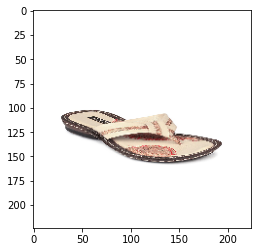

Fotoğraf Yüklendi!!!!!


In [8]:
#Bir tane örnek fotoğraf gösteriyoruz
original = load_img(files[699], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Fotoğraf Yüklendi!!!!!")

In [9]:
#verilerin kerasta islenebilmesi icin PIL image turunu numpy image turune ceviriyoruz *(w,h,channel)->(h,w,channel)
numpy_image = img_to_array(original)

# (batchsize, height, width, channels)
#fotografa ek bir boyuyt ekliyoruz axis 0 icin.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# sonra modeli VGG modeli veya Resnet modeli icin hazirliyoruz fotograflarimizi
processed_image = preprocess_input(image_batch.copy())
print(len(files))

image batch size (1, 224, 224, 3)
2906


In [10]:
# Öz nitelik çıkartıyoruz bir fotoğraf için
img_features = feat_extractor.predict(processed_image)

print("Öz nitelikler çıkartıldı!")
print("Fotoğraf öznitelik sayısı :",img_features.size)
img_features
print(len(files))

Öz nitelikler çıkartıldı!
Fotoğraf öznitelik sayısı : 4096
2906


In [11]:
# Daha sonra modeli beslemek icin tum fotograflarimi yukluyoruz.

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [12]:
# Sonra tüm fotoğraflar için tekrar oznitelikleri cikartiyoruz

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2906, 4096)

In [13]:
# Burada kosinus benzerlik formulu ile elde edilen oz nitelik vektorlerinin benzerliklerini karsilastiriyoruz 

cosSimilarities = cosine_similarity(imgs_features)

# daha sonra da her bir fotograf çıkarılan benzerlik vektörlerinden oluşan bir data frame icersine kaydediyoruz

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()
#2906x2096lik bir benzerlik data frame'i olusturuldu.

,images/44770.jpg,images/37247.jpg,images/41438.jpg,images/38654.jpg,images/37241.jpg,images/44947.jpg,images/43959.jpg,images/49435.jpg,images/5290.jpg,images/42089.jpg,images/4112.jpg,images/54518.jpg,images/39980.jpg,images/44948.jpg,images/44779.jpg,images/50749.jpg,images/42044.jpg,images/41868.jpg,images/4184.jpg,images/44713.jpg,images/41452.jpg,images/43350.jpg,images/38662.jpg,images/50778.jpg,images/42011.jpg,images/49061.jpg,images/5405.jpg,images/5238.jpg,images/43368.jpg,images/35713.jpg,images/40971.jpg,images/50746.jpg,images/39972.jpg,images/38655.jpg,images/40776.jpg,images/41866.jpg,images/39988.jpg,images/36442.jpg,images/50776.jpg,images/44572.jpg,...,images/24945.jpg,images/54907.jpg,images/8327.jpg,images/16806.jpg,images/2702.jpg,images/31178.jpg,images/31129.jpg,images/34003.jpg,images/2730.jpg,images/18174.jpg,images/8335.jpg,images/17612.jpg,images/54933.jpg,images/24985.jpg,images/24944.jpg,images/31175.jpg,images/2716.jpg,images/30726.jpg,images/5421.jpg,images/25520.jpg,images/21863.jpg,images/16805.jpg,images/54896.jpg,images/29171.jpg,images/54958.jpg,images/17620.jpg,images/33271.jpg,images/31176.jpg,images/31117.jpg,images/29166.jpg,images/8339.jpg,images/26983.jpg,images/24946.jpg,images/5420.jpg,images/18175.jpg,images/24947.jpg,images/37586.jpg,images/37568.jpg,images/37628.jpg,images/37607.jpg
images/44770.jpg,1.000000,0.714391,0.681617,0.634721,0.727225,0.704957,0.700154,0.770120,0.580606,0.748968,0.654849,0.618350,0.726490,0.773247,0.763415,0.483716,0.706504,0.456922,0.464514,0.452721,0.639538,0.582839,0.696470,0.836716,0.449417,0.644408,0.605809,0.399754,0.513674,0.698298,0.501565,0.514019,0.594363,0.642002,0.548984,0.456156,0.711148,0.805437,0.512882,0.582483,...,0.233561,0.327780,0.321956,0.387492,0.322291,0.355522,0.258479,0.259042,0.221431,0.195341,0.234048,0.276164,0.342850,0.217777,0.276172,0.286211,0.236718,0.256036,0.260879,0.273787,0.275297,0.290935,0.281180,0.234570,0.241555,0.386395,0.280108,0.346308,0.259055,0.164099,0.261595,0.324416,0.290051,0.234039,0.193242,0.295826,0.311892,0.232738,0.282438,0.250132
images/37247.jpg,0.714391,1.000000,0.586905,0.655137,0.723088,0.681916,0.604333,0.718557,0.633456,0.687017,0.501741,0.549297,0.738661,0.715709,0.732010,0.462380,0.687849,0.410940,0.561997,0.374605,0.586888,0.547425,0.713468,0.734751,0.426674,0.667798,0.560390,0.431442,0.485269,0.666032,0.490804,0.649536,0.569507,0.568605,0.495570,0.410010,0.607914,0.777199,0.535344,0.559026,...,0.236848,0.336236,0.332651,0.372260,0.259736,0.359599,0.278309,0.266709,0.204780,0.231043,0.229809,0.257429,0.339579,0.247491,0.287095,0.314592,0.209566,0.248159,0.235036,0.240265,0.217486,0.308359,0.278749,0.240027,0.227337,0.365882,0.236120,0.315394,0.268740,0.211642,0.250521,0.319162,0.246904,0.215439,0.239891,0.287598,0.252597,0.217393,0.284560,0.275967
images/41438.jpg,0.681617,0.586905,1.000000,0.741712,0.624438,0.712884,0.633422,0.682886,0.532671,0.780812,0.442765,0.649899,0.631054,0.672999,0.713659,0.478430,0.716336,0.385879,0.461148,0.400088,0.791204,0.493141,0.665285,0.724629,0.376595,0.580348,0.747809,0.348738,0.505344,0.677555,0.429609,0.523077,0.514896,0.706998,0.483766,0.419257,0.786198,0.723535,0.399651,0.443518,...,0.228117,0.260888,0.291317,0.430116,0.315235,0.261541,0.237241,0.283410,0.223502,0.209836,0.186426,0.249973,0.305739,0.232165,0.286323,0.262251,0.285192,0.237493,0.274645,0.254119,0.219970,0.219623,0.181736,0.172403,0.245348,0.249178,0.233812,0.340888,0.284532,0.147818,0.257398,0.229235,0.354067,0.195074,0.202983,0.280252,0.270968,0.247330,0.256122,0.246862
images/38654.jpg,0.634721,0.655137,0.741712,1.000000,0.667776,0.794862,0.639745,0.721066,0.639491,0.755755,0.372516,0.750231,0.667879,0.621569,0.792316,0.489260,0.746240,0.440960,0.572839,0.342267,0.653937,0.549756,0.684116,0.707571,0.404153,0.595861,0.686544,0.383198,0.542169,0.654349,0.451271,0.607175,0.569707,0.835266,0.498855,0.419504,0.711074,0.684608,0.441763,0.464852,...,0.320088,0.325044,0.340877,0.423283,0.315945

In [14]:
#Bir csv içine daha sonra kullanmak için kaydediyoruz.
cos_similarities_df.to_csv('cos_sim.csv',index=False,)
print(len(files))

2906


In [ ]:
#print(len(processed_imgs))

#or x in range(cos_similarities_df.shape[0]):
#   for y in range(cos_similarities_df.shape[1]):
#     if (cos_similarities_df.iloc[x,y]>=0.99 and x!=y):
#       try:
#           list_of_deletion.append(files[x])
#           print(cos_similarities_df.columns[x],cos_similarities_df.index[y])
#       except:
#           print(cos_similarities_df.columns[x],cos_similarities_df.index[y])
       


# importedImages = []

# for f in lists:
#     filename = f
#     original = load_img(filename, target_size=(224, 224))
#     numpy_image = img_to_array(original)
#     image_batch = np.expand_dims(numpy_image, axis=0)
    
#     importedImages.append(image_batch)

# images = np.vstack(importedImages)

# processed_imgs = preprocess_input(images.copy())




In [15]:
#Kayıt kontrol ediliyor
pd.read_csv('cos_sim.csv')

,images/44770.jpg,images/37247.jpg,images/41438.jpg,images/38654.jpg,images/37241.jpg,images/44947.jpg,images/43959.jpg,images/49435.jpg,images/5290.jpg,images/42089.jpg,images/4112.jpg,images/54518.jpg,images/39980.jpg,images/44948.jpg,images/44779.jpg,images/50749.jpg,images/42044.jpg,images/41868.jpg,images/4184.jpg,images/44713.jpg,images/41452.jpg,images/43350.jpg,images/38662.jpg,images/50778.jpg,images/42011.jpg,images/49061.jpg,images/5405.jpg,images/5238.jpg,images/43368.jpg,images/35713.jpg,images/40971.jpg,images/50746.jpg,images/39972.jpg,images/38655.jpg,images/40776.jpg,images/41866.jpg,images/39988.jpg,images/36442.jpg,images/50776.jpg,images/44572.jpg,...,images/24945.jpg,images/54907.jpg,images/8327.jpg,images/16806.jpg,images/2702.jpg,images/31178.jpg,images/31129.jpg,images/34003.jpg,images/2730.jpg,images/18174.jpg,images/8335.jpg,images/17612.jpg,images/54933.jpg,images/24985.jpg,images/24944.jpg,images/31175.jpg,images/2716.jpg,images/30726.jpg,images/5421.jpg,images/25520.jpg,images/21863.jpg,images/16805.jpg,images/54896.jpg,images/29171.jpg,images/54958.jpg,images/17620.jpg,images/33271.jpg,images/31176.jpg,images/31117.jpg,images/29166.jpg,images/8339.jpg,images/26983.jpg,images/24946.jpg,images/5420.jpg,images/18175.jpg,images/24947.jpg,images/37586.jpg,images/37568.jpg,images/37628.jpg,images/37607.jpg
0,1.000000,0.714391,0.681617,0.634721,0.727225,0.704957,0.700154,0.770120,0.580606,0.748968,0.654849,0.618350,0.726490,0.773247,0.763415,0.483716,0.706504,0.456922,0.464514,0.452721,0.639538,0.582839,0.696470,0.836716,0.449417,0.644408,0.605809,0.399754,0.513674,0.698298,0.501565,0.514019,0.594363,0.642002,0.548984,0.456156,0.711148,0.805437,0.512881,0.582483,...,0.233561,0.327780,0.321956,0.387492,0.322291,0.355522,0.258479,0.259042,0.221431,0.195341,0.234048,0.276164,0.342850,0.217777,0.276172,0.286211,0.236718,0.256036,0.260879,0.273787,0.275297,0.290935,0.281180,0.234570,0.241555,0.386395,0.280108,0.346308,0.259055,0.164099,0.261595,0.324416,0.290051,0.234039,0.193242,0.295826,0.311892,0.232738,0.282438,0.250132
1,0.714391,1.000000,0.586905,0.655138,0.723088,0.681916,0.604333,0.718557,0.633456,0.687017,0.501741,0.549297,0.738661,0.715709,0.732010,0.462380,0.687849,0.410940,0.561997,0.374605,0.586888,0.547425,0.713468,0.734751,0.426674,0.667798,0.560390,0.431442,0.485269,0.666032,0.490804,0.649536,0.569507,0.568605,0.495570,0.410010,0.607914,0.777199,0.535344,0.559026,...,0.236848,0.336236,0.332651,0.372260,0.259736,0.359599,0.278309,0.266709,0.204780,0.231043,0.229809,0.257429,0.339579,0.247491,0.287095,0.314592,0.209566,0.248159,0.235036,0.240265,0.217486,0.308359,0.278749,0.240027,0.227337,0.365882,0.236120,0.315394,0.268740,0.211642,0.250521,0.319162,0.246904,0.215439,0.239891,0.287598,0.252597,0.217393,0.284560,0.275967
2,0.681617,0.586905,1.000000,0.741712,0.624438,0.712884,0.633422,0.682886,0.532671,0.780812,0.442765,0.649899,0.631054,0.672999,0.713659,0.478430,0.716336,0.385879,0.461148,0.400088,0.791204,0.493141,0.665285,0.724629,0.376595,0.580348,0.747809,0.348738,0.505344,0.677555,0.429609,0.523077,0.514896,0.706998,0.483766,0.419257,0.786198,0.723535,0.399651,0.443518,...,0.228117,0.260888,0.291317,0.430116,0.315235,0.261541,0.237241,0.283410,0.223502,0.209836,0.186426,0.249973,0.305739,0.232165,0.286323,0.262251,0.285191,0.237493,0.274645,0.254119,0.219970,0.219623,0.181736,0.172403,0.245348,0.249178,0.233812,0.340888,0.284532,0.147818,0.257398,0.229235,0.354067,0.195074,0.202983,0.280252,0.270968,0.247330,0.256122,0.246862
3,0.634721,0.655138,0.741712,1.000000,0.667776,0.794862,0.639745,0.721066,0.639491,0.755755,0.372516,0.750231,0.667879,0.621569,0.792316,0.489260,0.746240,0.440960,0.572839,0.342267,0.653937,0.549756,0.684116,0.707571,0.404153,0.595861,0.686544,0.383198,0.542169,0.654349,0.451271,0.607175,0.569707,0.835266,0.498855,0.419504,0.711074,0.684608,0.441763,0.464852,...,0.320088,0.325044,0.340877,0.423283,0.315945,0.288723,0.242434,0.367308,0.243371,0.225607,0.250802,0.289

In [16]:
# Bir fotograf icin dondurulen en benzer urunler listeleyen fonksiyon

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    print(given_img)

    print("-----------------------------------------------------------------------")
    print("most similar products:")
    

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])
        print(closest_imgs[i])

-----------------------------------------------------------------------
original product:


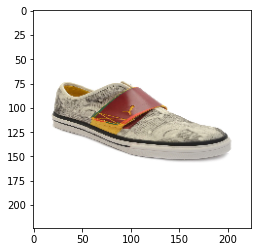

images/9001.jpg
-----------------------------------------------------------------------
most similar products:


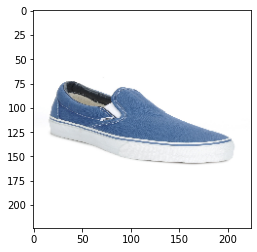

similarity score :  0.87739134
images/49435.jpg


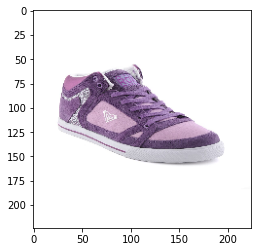

similarity score :  0.8757458
images/21471.jpg


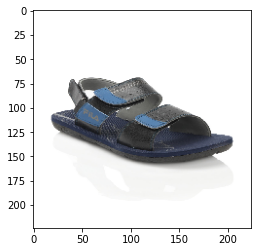

similarity score :  0.8755546
images/34785.jpg


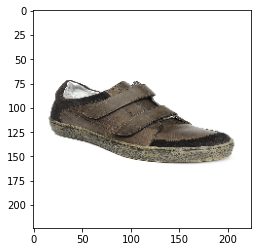

similarity score :  0.8729819
images/10632.jpg


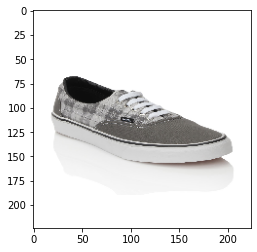

similarity score :  0.870327
images/34861.jpg


In [17]:
#Bir fotoğraf için test yapıyoruz
retrieve_most_similar_products(files[97])

In [ ]:
print(len(files))

417


In [ ]:
print(files)

['images/3811.jpg', 'images/35876.jpg', 'images/5420.jpg', 'images/46732.jpg', 'images/15576.jpg', 'images/40983.jpg', 'images/40142.jpg', 'images/50717.jpg', 'images/34021.jpg', 'images/46831.jpg', 'images/24874.jpg', 'images/41968.jpg', 'images/40956.jpg', 'images/48256.jpg', 'images/40978.jpg', 'images/40927.jpg', 'images/34020.jpg', 'images/35995.jpg', 'images/37538.jpg', 'images/37172.jpg', 'images/22637.jpg', 'images/3815.jpg', 'images/31108.jpg', 'images/31158.jpg', 'images/37523.jpg', 'images/24910.jpg', 'images/34174.jpg', 'images/3807.jpg', 'images/37625.jpg', 'images/39839.jpg', 'images/39855.jpg', 'images/15573.jpg', 'images/31097.jpg', 'images/38497.jpg', 'images/8338.jpg', 'images/30721.jpg', 'images/38943.jpg', 'images/35875.jpg', 'images/5216.jpg', 'images/38986.jpg', 'images/37620.jpg', 'images/38491.jpg', 'images/40934.jpg', 'images/48258.jpg', 'images/8353.jpg', 'images/41957.jpg', 'images/18181.jpg', 'images/30722.jpg', 'images/34185.jpg', 'images/4325.jpg', 'images